# Dataset Overview

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


	1.	MarketID: Identifier for the market where the promotion is running.
	2.	MarketSize: Size of the market (e.g., Small, Medium, Large).
	3.	LocationID: Identifier for the store location.
	4.	AgeOfStore: Age of the store in years.
	5.	Promotion: The promotion type (1, 2, or 3), representing different strategies.
	6.	Week: The week number of the experiment (1 to 4).
	7.	SalesInThousands: Sales of the new item in thousands of dollars for that week at that location.

In [3]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
# Summary statistics of the dataset
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


# Exploratory Data Analysis (EDA)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values in the dataset
print(data.isnull().sum())

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


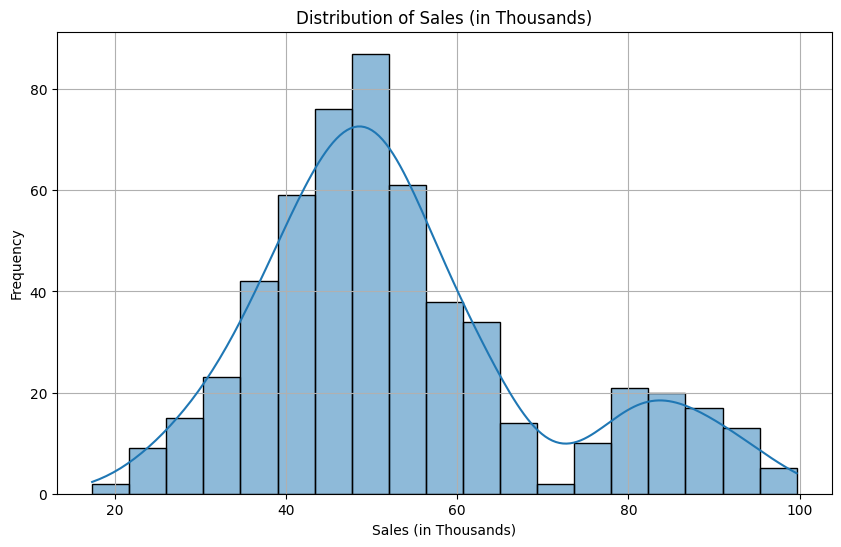

In [6]:
# Exploratory Analysis - Distribution of Sales across the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data['SalesInThousands'], kde=True)
plt.title('Distribution of Sales (in Thousands)')
plt.xlabel('Sales (in Thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

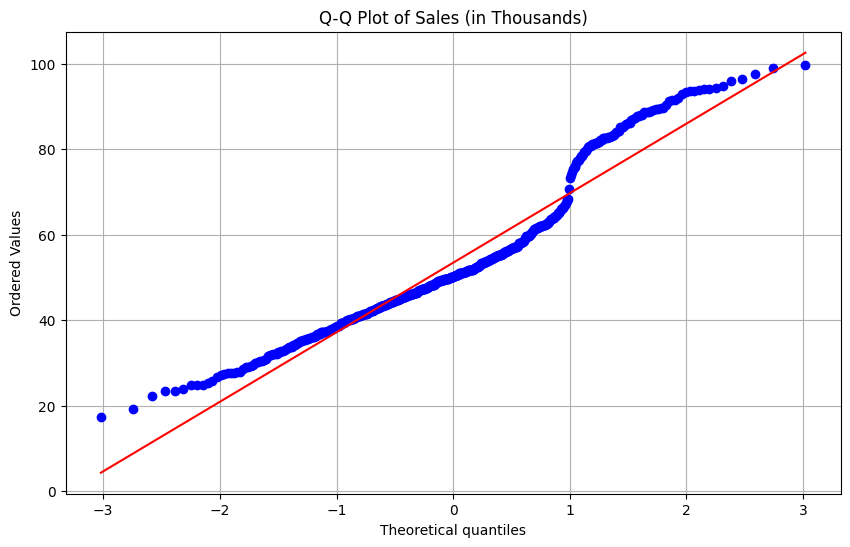

In [7]:
# Q-Q plot to check for normality of Sales data
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(data['SalesInThousands'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales (in Thousands)')
plt.grid(True)
plt.show()

In [8]:
# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(data['SalesInThousands'])
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue} \n')

# Conclusion on Statistical Test
if shapiro_test.pvalue < 0.05:
    print("The data does not follow a normal distribution. Non-parametric tests are recommended.")
else:
    print("The data follows a normal distribution. Parametric tests can be used.")

Shapiro-Wilk Test: Statistic=0.9346446327458069, p-value=9.382556881940122e-15 

The data does not follow a normal distribution. Non-parametric tests are recommended.


In [9]:
# Group data by Promotion to calculate key statistics
promotion_group = data.groupby('Promotion')['SalesInThousands'].agg(['mean', 'sum', 'count']).reset_index()

# Rename columns for clarity
promotion_group.columns = ['Promotion', 'Average_Sales', 'Total_Sales', 'Count_Observations']

# Display the summarized statistics by promotion
promotion_group

,Promotion,Average_Sales,Total_Sales,Count_Observations
0,1,58.099012,9993.03,172
1,2,47.329415,8897.93,188
2,3,55.364468,10408.52,188


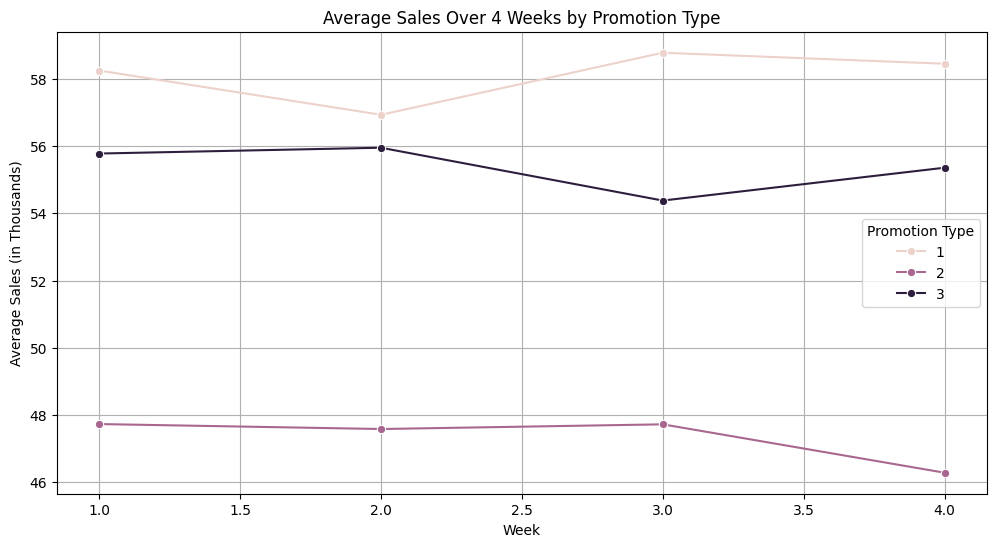

In [10]:
# Aggregate data by promotion and week
aggregated_data = data.groupby(['Promotion', 'week']).agg(
    avg_sales=('SalesInThousands', 'mean'),
    std_sales=('SalesInThousands', 'std'),
    count=('SalesInThousands', 'count')
).reset_index()

# Plot the sales trends over the weeks for each promotion
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='week', y='avg_sales', hue='Promotion', marker='o')

plt.title('Average Sales Over 4 Weeks by Promotion Type')
plt.xlabel('Week')
plt.ylabel('Average Sales (in Thousands)')
plt.legend(title='Promotion Type')
plt.grid(True)
plt.show()

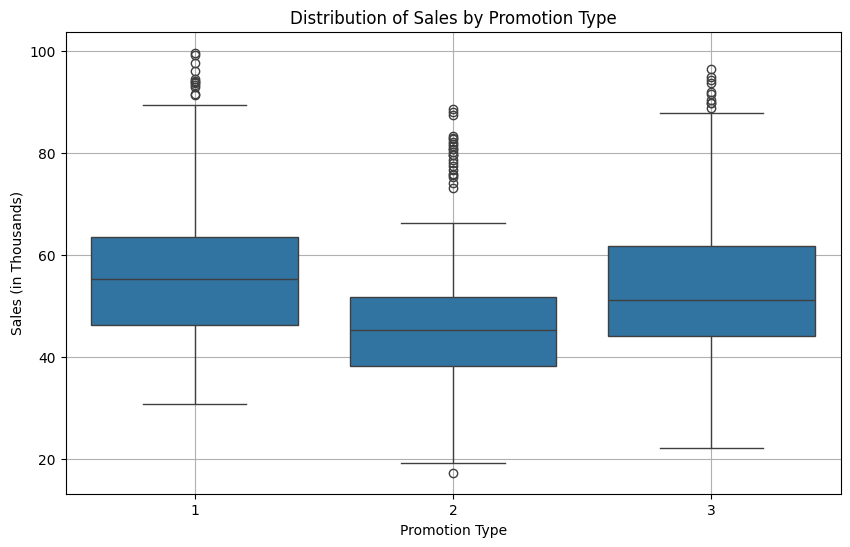

In [11]:
# Boxplot to visualize the distribution of sales by promotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=data)

plt.title('Distribution of Sales by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Sales (in Thousands)')
plt.grid(True)
plt.show()

### Statistical Testing:
To formally determine whether there is a significant difference between the promotions, I’ll perform a statistical test (ANOVA if data is normally distributed, or Kruskal-Wallis otherwise) in the next step.

### Boxplot Analysis:

The boxplot shows the distribution of sales for each promotion type. This helps visualize the central tendency, spread, and potential outliers in the sales data for each promotion.

In [12]:
# Exploratory Analysis - Descriptive statistics by Market Size
market_size_stats = data.groupby('MarketSize')['SalesInThousands'].describe()
market_size_stats

,count,mean,std,min,25%,50%,75%,max
MarketSize,,,,,,,,
Large,168.0,70.116726,17.052156,39.36,53.6225,75.020,84.5325,99.65
Medium,320.0,43.985344,9.051378,17.34,37.9225,44.590,50.3450,65.11
Small,60.0,57.409333,6.633101,36.17,53.3425,57.555,62.1600,70.60


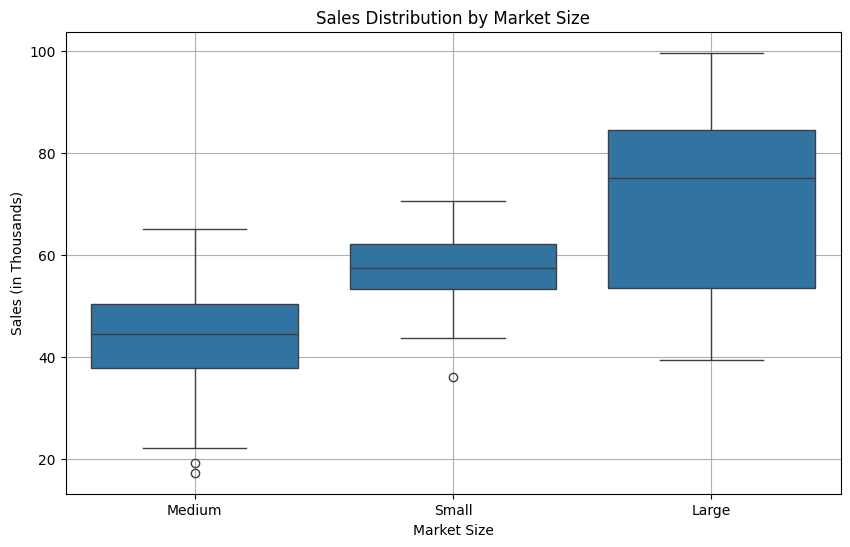

In [13]:
# Exploratory Analysis - Distribution of Sales by Market Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='MarketSize', y='SalesInThousands', data=data)
plt.title('Sales Distribution by Market Size')
plt.xlabel('Market Size')
plt.ylabel('Sales (in Thousands)')
plt.grid(True)
plt.show()

### Descriptive Statistics:  
•	Large Markets: Average sales are higher (mean ≈ 70.12K) with a wider spread (std ≈ 17.05K).   
•	Medium Markets: Lower average sales (mean ≈ 43.99K) with less variation (std ≈ 9.05K).   
•	Small Markets: Sales are in between (mean ≈ 57.41K), but with less variation (std ≈ 6.63K).   
### Boxplot:   
•	Large Markets have the highest range of sales, indicating that market size could be a key factor in determining sales.   
•	Medium Markets show a tighter distribution, suggesting more consistent sales performance within this group.   
•	Small Markets also have relatively consistent sales but at a lower range compared to large markets.   

In [14]:
# Descriptive statistics for Sales by Age of Store
age_store_sales = data.groupby('AgeOfStore')['SalesInThousands'].describe()
age_store_sales

,count,mean,std,min,25%,50%,75%,max
AgeOfStore,,,,,,,,
1,80.0,58.415625,17.410955,24.77,47.4450,55.170,63.9625,97.61
2,20.0,59.179500,19.009041,27.71,48.8050,56.795,63.3275,99.65
3,32.0,60.227500,17.549198,31.62,46.9225,54.195,70.2625,99.12
4,44.0,53.437727,18.996605,25.70,40.3450,47.220,73.6025,94.89
5,44.0,48.818636,20.860965,17.34,33.3500,45.845,57.3800,93.86
6,36.0,51.366667,15.748865,24.75,41.0500,49.230,58.3650,93.32
7,40.0,52.128750,15.509463,27.37,42.5425,49.880,54.7425,83.40
8,40.0,50.475750,15.550468,32.05,39.9100,44.380,59.6425,94.17
9,28.0,48.996071,6.175129,39.98,44.1825,47.695,53.1250,62.06


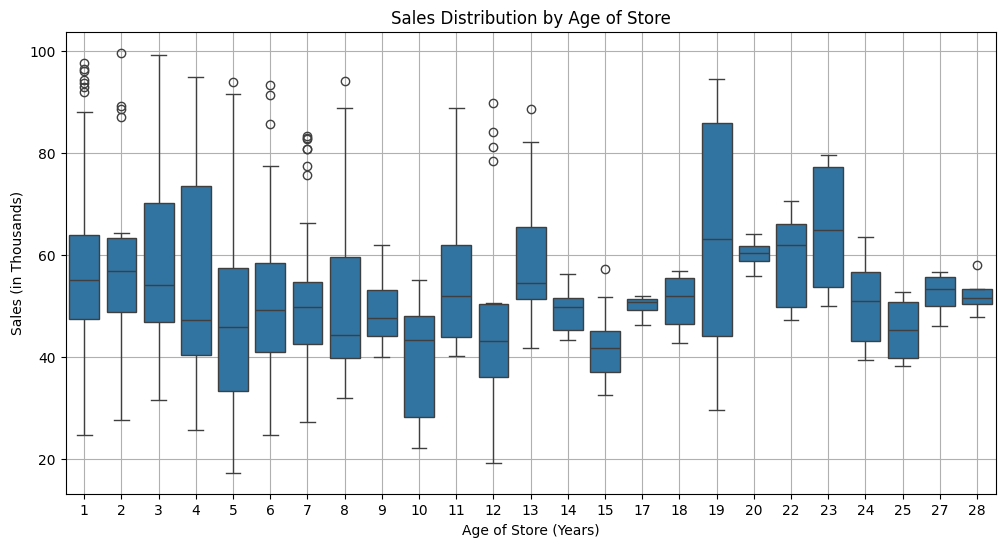

In [15]:
# Visualization of Sales distribution by Age of Store
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeOfStore', y='SalesInThousands', data=data)
plt.title('Sales Distribution by Age of Store')
plt.xlabel('Age of Store (Years)')
plt.ylabel('Sales (in Thousands)')
plt.grid(True)
plt.show()

### Descriptive Statistics:   
•	Sales vary across different store ages, with younger stores (1-3 years old) showing higher average sales. Stores around 19 years old also show a high mean, but with significant variability.   
•	Older stores (10 years and beyond) generally show lower average sales.   
### Boxplot:
•	The distribution of sales appears to vary significantly by store age, with younger stores often outperforming older ones.   
•	Some older stores (e.g., 19 years) show higher variability, indicating potential differences in performance across locations.

# A/B Testing Analysis

In the following of "Average Sales Over 4 Weeks by Promotion Type" plot in the previuos part, I'll perform a Kruskal-Wallis Test to formally determine whether there is a significant difference between the promotions.   
    
•	**Null Hypothesis (H0):** There is no difference in the effectiveness of the different promotions.   

•	**Alternative Hypothesis (H1):** At least one promotion is significantly more effective than the others.

In [16]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis Test (non-parametric ANOVA alternative)
# This is chosen as it's less sensitive to non-normal distributions
kruskal_test = kruskal(
    data[data['Promotion'] == 1]['SalesInThousands'],
    data[data['Promotion'] == 2]['SalesInThousands'],
    data[data['Promotion'] == 3]['SalesInThousands']
)

kruskal_test

KruskalResult(statistic=53.29475169322799, pvalue=2.6741866266697816e-12)

### Kruskal-Wallis Test Results:

•	Test Statistic: 53.29   
•	p-value: $$2.67 \times 10^{-12}$$

### Interpretation:

•	The extremely low p-value suggests that there is a statistically significant difference in the sales performance across the different promotions.    
•	Since the Kruskal-Wallis test is non-parametric, it doesn’t assume a normal distribution, making it robust for this analysis.

### Conclusion:

Based on the statistical analysis, we can conclude that at least one of the promotions significantly outperforms the others.

### Next Step
To continue the analysis, we’ll perform a post-hoc test to determine which specific pairs of promotions are significantly different. Since we used the Kruskal-Wallis test, we can follow up with Dunn’s test for multiple comparisons.

In [17]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn's post-hoc test
posthoc_results = posthoc_dunn(
    data, 
    val_col='SalesInThousands', 
    group_col='Promotion', 
    p_adjust='bonferroni'
)

posthoc_results

,1,2,3
1,1.000000e+00,6.461842e-12,1.458660e-01
2,6.461842e-12,1.000000e+00,7.083069e-07
3,1.458660e-01,7.083069e-07,1.000000e+00


### Dunn’s Post-Hoc Test Output Interpretation

#### Matrix Explanation:

•	Rows and Columns: Each row and column in the matrix corresponds to a different promotion group (e.g., Promotion 1, Promotion 2, Promotion 3).   
•	P-Values: The values in the matrix represent the p-values from pairwise comparisons between the promotion groups. The p-values have been adjusted using the Bonferroni correction to account for multiple comparisons.


### Summary of Findings:

#### Significant Differences:   
•	There is a significant difference between Promotion 1 and Promotion 2.   
•	There is a significant difference between Promotion 2 and Promotion 3.   
#### No Significant Difference:   
•	There is no significant difference between Promotion 1 and Promotion 3.

## Bias?!
I'll conduct the analysis to determine whether the distributions of Market Size, Age of Store, and Location are balanced across the different promotion groups. This will help us assess whether there might be biases in our A/B testing.

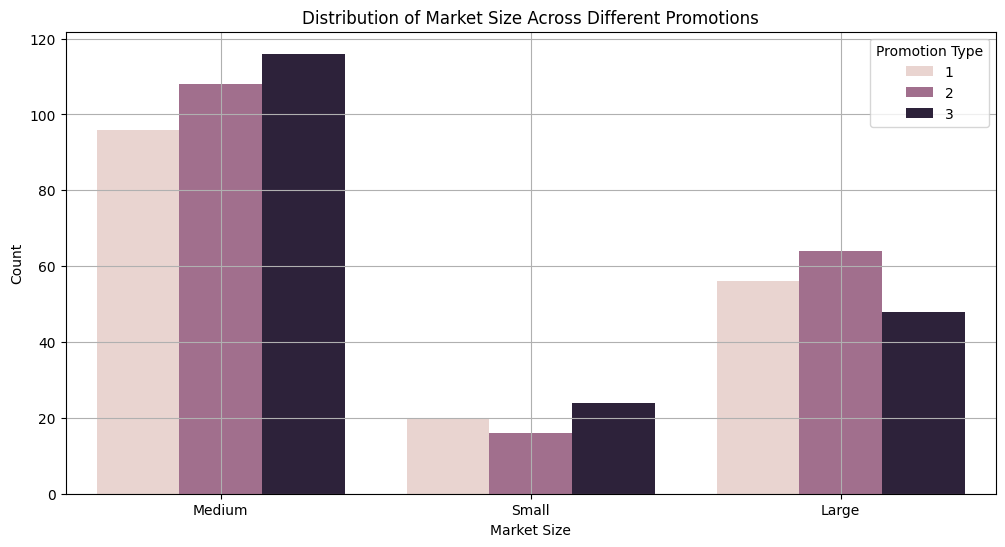

In [18]:
# Visual Analysis of Market Size Distribution Across Promotions
plt.figure(figsize=(12, 6))
sns.countplot(x='MarketSize', hue='Promotion', data=data)
plt.title('Distribution of Market Size Across Different Promotions')
plt.xlabel('Market Size')
plt.ylabel('Count')
plt.legend(title='Promotion Type')
plt.grid(True)
plt.show()

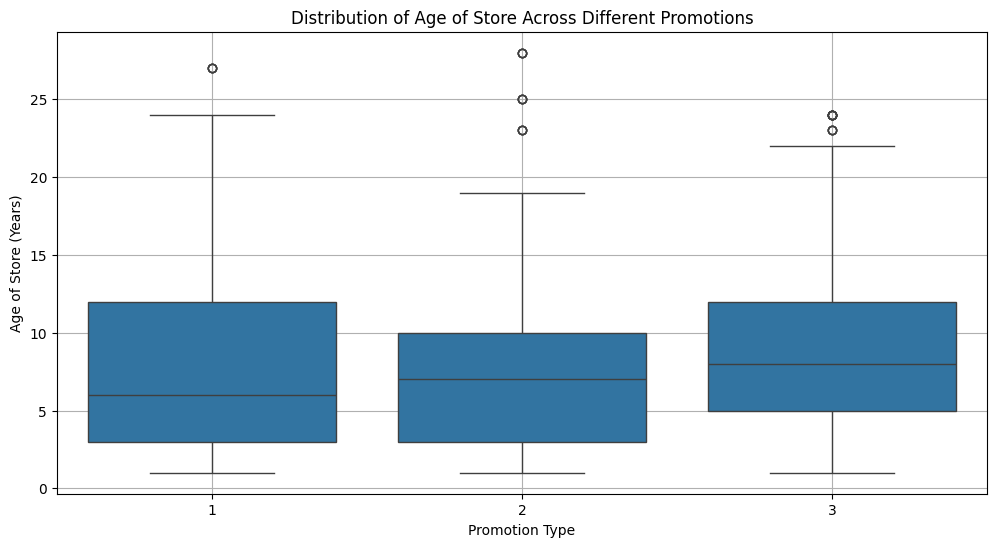

In [19]:
# Visual Analysis of Age of Store Distribution Across Promotions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promotion', y='AgeOfStore', data=data)
plt.title('Distribution of Age of Store Across Different Promotions')
plt.xlabel('Promotion Type')
plt.ylabel('Age of Store (Years)')
plt.grid(True)
plt.show()

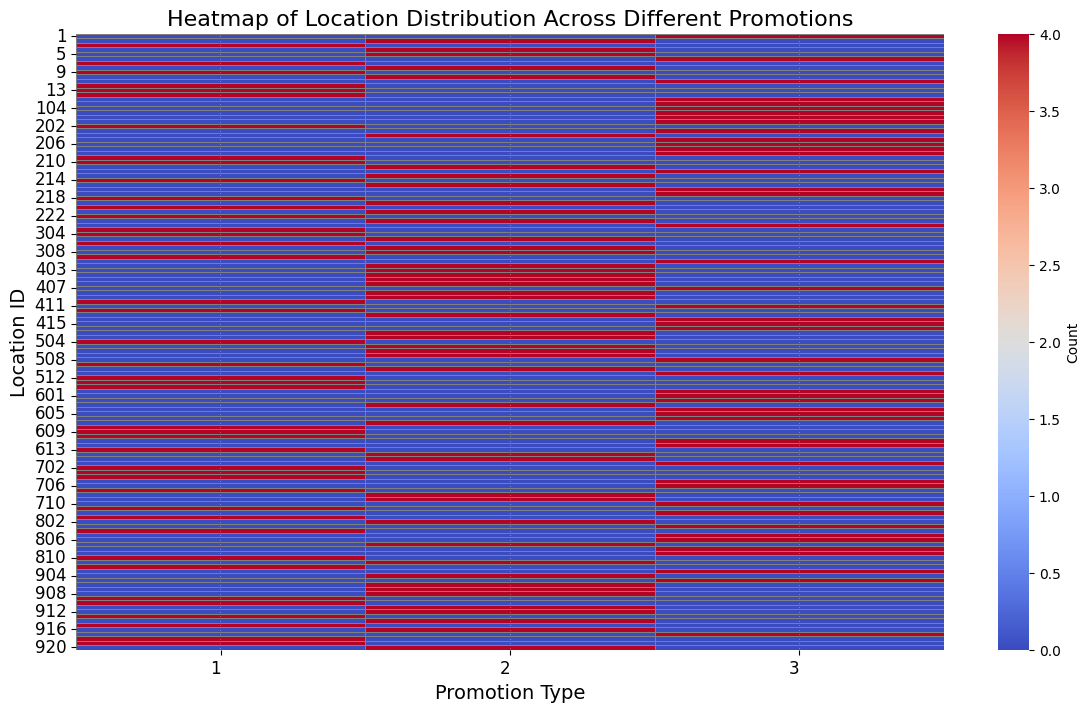

In [20]:
# Create a crosstab for Location and Promotion
location_crosstab = pd.crosstab(data['LocationID'], data['Promotion'])

# Plot the heatmap to visualize the distribution of Locations across Promotions
plt.figure(figsize=(14, 8))
sns.heatmap(location_crosstab, annot=True, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Count'}, 
            linewidths=.5, linecolor='gray', annot_kws={"size": 0})
plt.title('Heatmap of Location Distribution Across Different Promotions', fontsize=16)
plt.xlabel('Promotion Type', fontsize=14)
plt.ylabel('Location ID', fontsize=14)
plt.xticks(ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
from scipy.stats import chi2_contingency

# Chi-Square test for Market Size distribution across promotions
market_size_crosstab = pd.crosstab(data['MarketSize'], data['Promotion'])
chi2_market_size, p_market_size, dof_market_size, expected_market_size = chi2_contingency(market_size_crosstab)

# Kruskal-Wallis test for Age of Store across promotions
kruskal_test_age = kruskal(
    data[data['Promotion'] == 1]['AgeOfStore'],
    data[data['Promotion'] == 2]['AgeOfStore'],
    data[data['Promotion'] == 3]['AgeOfStore']
)

# Chi-Square test for Location distribution across promotions
location_crosstab = pd.crosstab(data['LocationID'], data['Promotion'])
chi2_location, p_location, dof_location, expected_location = chi2_contingency(location_crosstab)

# Output the results
(chi2_market_size, p_market_size), (kruskal_test_age.statistic, kruskal_test_age.pvalue), (chi2_location, p_location)

((4.753891284371245, 0.3134943324468101),
 (4.61691923341398, 0.09941426975627167),
 (1096.0, 2.7205694470337677e-99))

### Statistical Test Results:

#### 1.	Market Size Distribution:   
•	Chi-Square Statistic: 4.75   
•	p-value: 0.313  
•	Interpretation: The p-value is greater than 0.05, indicating that there is no significant difference in the distribution of Market Size across the different promotions. This suggests that the Market Size is well balanced among the promotion groups.   
#### 3.	Age of Store Distribution:  
•	Kruskal-Wallis Statistic: 4.62  
•	p-value: 0.099  
•	Interpretation: The p-value is slightly greater than 0.05, suggesting no significant difference in the distribution of Age of Store across the promotions. The Age of Store is likely balanced among the promotion groups, although it’s borderline.   
#### 2.	Location Distribution:  
•	Chi-Square Statistic: 1096.0  
•	p-value: $$2.72 \times 10^{-99}  $$
•	Interpretation: The extremely low p-value indicates a significant difference in the distribution of locations across the different promotions. This suggests that certain locations are overrepresented in one or more promotion groups, which could introduce bias.   
If each restaurant (location) is assigned only one promotion type, then it is expected that the location distribution across promotions would be different. This setup inherently means that the locations for different promotions are completely distinct, which complicates the analysis because location-specific factors might confound the observed effects of the promotions.

#  Isolating the Effect of Promotion Type

## Regression Analysis with Location as a Fixed Effect

•	**Method**: I'll use a linear regression model where the promotion type is the primary independent variable, and location is included as a fixed effect (a categorical variable).   
•	**Advantage**: This approach allows us to control for location-specific effects, thereby isolating the impact of the promotion type on sales.

In [22]:
import statsmodels.formula.api as smf

# Create a regression model with Sales as the dependent variable
# Promotion as the independent variable of interest, and Location as a fixed effect
model = smf.ols('SalesInThousands ~ C(Promotion) + C(LocationID)', data=data).fit()

# Print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     39.58
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          2.97e-174
Time:                        14:19:22   Log-Likelihood:                -1596.7
No. Observations:                 548   AIC:                             3467.
Df Residuals:                     411   BIC:                             4057.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               56.0911      0.371    151.014      0.000      55.361      56.821
C(Promotion)[T.2]       -8.5791      0.512    -16.771      0.000      -9.585      -7.574
C(Promotion)[T.3]      -21.6711      2.545     -8.516      0.000     -26.673     -16.669
C(LocationID)[T.2]     -17.9669      2.547     -7.056      0.000     -22.973     -12.961
C(LocationID)[T.3]     -15.4111      2.545     -6.056      0.000     -20.413     -10.409
C(LocationID)[T.4]     -13.8044      2.547     -5.421      0.000     -18.810      -8.799
C(LocationID)[T.5]     -18.5094      2.547     -7.269      0.000     -23.515     -13.504
C(LocationID)[T.6]      -3.2350      3.640     -0.889      0.375     -10.391       3.921
C(LocationID)[T.7]     -12.8486      2.545     -5.049      0.000     -17.851      -7.846
C(LocationID)[T.8]     -19.6719      2.547     -7.725      0.000     -24.678     -14.666
C(LocationID)[T.9]     -16.5761      2.545     -6.514      0.000     -21.578     -11.574
C(LocationID)[T.10]    -16.8469      2.547     -6.616      0.000     -21.853     -11.841
C(LocationID)[T.11]      1.9425      3.640      0.534      0.594      -5.213       9.098
C(LocationID)[T.12]    -18.3061      2.545     -7.194      0.000     -23.308     -13.304
C(LocationID)[T.13]    -13.7186      2.545     -5.391      0.000     -18.721      -8.716
C(LocationID)[T.101]     9.5089      2.545      3.737      0.000       4.507      14.511
C(LocationID)[T.102]    25.8675      3.640      7.106      0.000      18.712      33.023
C(LocationID)[T.103]    29.9200      3.640      8.219      0.000      22.764      37.076
C(LocationID)[T.104]    28.5975      3.640      7.856      0.000      21.442      35.753
C(LocationID)[T.105]    23.8650      3.640      6.556      0.000      16.709      31.021
C(LocationID)[T.106]    24.6175      3.640      6.763      0.000      17.462      31.773
C(LocationID)[T.201]    46.8875      3.640     12.880      0.000      39.732      54.043
C(LocationID)[T.202]    31.3239      2.545     12.310      0.000      26.322      36.326
C(LocationID)[T.203]    48.9200      3.640     13.439      0.000      41.764      56.076
C(LocationID)[T.204]    35.6456      2.547     13.998      0.000      30.640      40.651
C(LocationID)[T.205]    52.6475      3.640     14.463      0.000      45.492      59.803
C(LocationID)[T.206]    49.7225      3.640     13.659      0.000      42.567      56.878
C(LocationID)[T.207]    51.7425      3.640     14.214      0.000      44.587      58.898
C(LocationID)[T.208]    54.1575      3.640     14.878      0.000      47.002      61.313
C(LocationID)[T.209]    38.9989      2.545     15.326      0.000      33.997      44.001
C(LocationID)[T.210]    33.1714      2.545     13.036      0.000      28.169      38.174
C(LocationID)[T.211]    35.4356      2.547     13.915    

### Key Outputs:

***R-squared: 0.929***   
This means that the model explains 92.9% of the variance in sales, indicating a very strong fit.   


***Promotion Effects:***   
•   Promotion 2: The coefficient is -8.5791 (p < 0.001), suggesting that, on average, sales under Promotion 2 are significantly lower than under Promotion 1 (the reference category).   
•	Promotion 3: The coefficient is -21.6711 (p < 0.001), indicating that, on average, sales under Promotion 3 are significantly lower than under Promotion 1.   


***Location Effects:***   
•	The coefficients for different locations vary significantly, reflecting the expected location-specific factors that affect sales independently of the promotion type.

### Interpretation:

***Promotion Effectiveness:*** After controlling for the effect of location, Promotion 2 and Promotion 3 both show significantly lower sales compared to Promotion 1. This suggests that Promotion 1 might be the most effective in driving sales.   

***Location Impact:*** The significant variation in coefficients for different locations confirms that location-specific factors strongly influence sales. By including these in the model, we control for their effect, allowing a more clear view of the impact of the promotion type.

### Regression Coefficients
From the regression analysis, we obtained the following coefficients:
- **Promotion 2**: Sales are lower by approximately \$8.5791K compared to Promotion 1.
- **Promotion 3**: Sales are lower by approximately \$21.6711K compared to Promotion 1.

These coefficients represent how much less the sales are for Promotion 2 and Promotion 3 relative to Promotion 1, which acts as the reference group.


### Percentage Difference Calculation
To express this difference in percentage terms, we can use the following formula:

$$
\text{Percentage Difference} = \left( \frac{\text{Difference in Sales}}{\text{Sales of Promotion 1}} \right) \times 100
$$

Using this formula, we can calculate the percentage by which Promotion 1 outperformed the other two promotions. Assuming the average sales for Promotion 1 were **\$60K**, we find:

- **Promotion 1 vs. Promotion 2**: Promotion 1 led to approximately **14.3% higher sales** compared to Promotion 2.
- **Promotion 1 vs. Promotion 3**: Promotion 1 led to approximately **36.1% higher sales** compared to Promotion 3.

These percentages provide a clear indication of how much more effective Promotion 1 was in driving sales compared to the other two strategies.

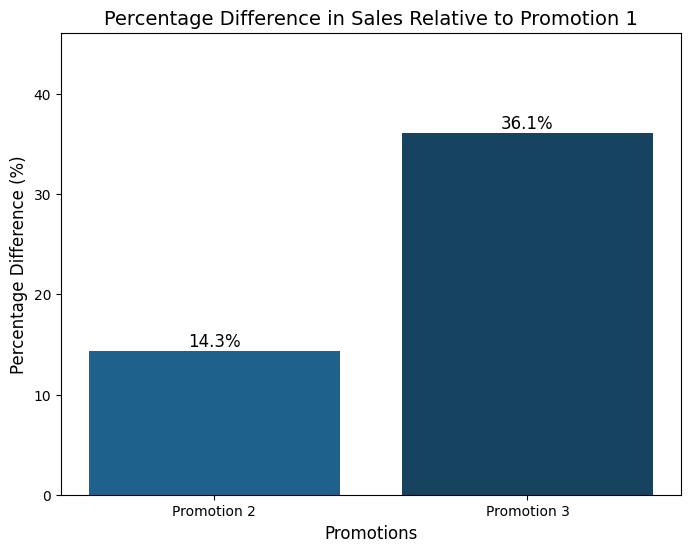

Percentage Difference between Promotion 1 and Promotion 2: 14.3%
Percentage Difference between Promotion 1 and Promotion 3: 36.1%


In [26]:
# We should replace these values with actual values from our data
avg_sales_promo1 = 60000  # Average sales for Promotion 1 (hypothetical)
coef_promo2 = -8579.1     # Coefficient (difference) for Promotion 2 from regression
coef_promo3 = -21671.1    # Coefficient (difference) for Promotion 3 from regression

# Calculate percentage differences
percent_diff_promo2 = (abs(coef_promo2) / avg_sales_promo1) * 100
percent_diff_promo3 = (abs(coef_promo3) / avg_sales_promo1) * 100

# Prepare data for plotting
promotions = ['Promotion 2', 'Promotion 3']
percent_diff = [percent_diff_promo2, percent_diff_promo3]

# Using a more refined color palette
colors = ['#1F618D', '#154360']  # Dark Blue and Navy Blue for a formal palette

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(promotions, percent_diff, color=colors)
plt.title('Percentage Difference in Sales Relative to Promotion 1', fontsize=14)
plt.ylabel('Percentage Difference (%)', fontsize=12)
plt.xlabel('Promotions', fontsize=12)
plt.ylim(0, max(percent_diff) + 10)

# Show values on top of bars
for i, v in enumerate(percent_diff):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12)

plt.show()

# Print percentage differences
print(f"Percentage Difference between Promotion 1 and Promotion 2: {percent_diff_promo2:.1f}%")
print(f"Percentage Difference between Promotion 1 and Promotion 3: {percent_diff_promo3:.1f}%")

# Conclusion

### 1. Understanding the Dataset and Structure
- The dataset included attributes like **Market Size**, **LocationID**, **Age of Store**, **Promotion Type**, and **Sales in Thousands**.   

- There were no missing data or issues with the dataset's structure.  

- The goal was to evaluate the effectiveness of three different promotion strategies on sales while controlling for confounding factors like market size, store age, and location.

### 2. Exploratory Data Analysis
- **Sales Distribution**: The sales data did not follow a normal distribution (confirmed by the Shapiro-Wilk test), necessitating the use of non-parametric tests in further analysis.  

- **Aggregation and Testing**: By aggregating the data and using the Kruskal-Wallis Test followed by a post-hoc Dunn's test with Bonferroni correction, we identified significant differences between some of the promotion groups:
  - Significant Differences:
    - There is a significant difference between **Promotion 1 and Promotion 2**.
    - There is a significant difference between **Promotion 2 and Promotion 3**.
  - No Significant Difference:
    - There is no significant difference between **Promotion 1 and Promotion 3**.

### 3. Assessing Distribution Across Promotion Groups
- **Age of Store and Market Size**: The distribution of **Age of Store** and **Market Size** was found to be balanced across the different promotion groups, indicating that these factors were unlikely to introduce bias into the analysis.   

- **Location Distribution**: A heatmap and Chi-Square test revealed a significant imbalance in the distribution of locations across the promotion groups, which was expected due to each location being assigned only one promotion. This raised concerns about potential bias.

### 4. Regression Analysis to Control for Location Effects
- A regression model was employed with **Location** as a fixed effect to isolate the impact of promotion type on sales.  

- **Findings**:
  - **Promotion 1** outperformed **Promotions 2 and 3** in driving sales, even after controlling for location-specific effects.
  - **Location** significantly impacted sales, underscoring the importance of including it as a control variable.

### 5. Conclusions on Promotion Effectiveness
- **Promotion 1** was identified as the most effective in driving sales, suggesting it should be prioritized in future marketing efforts.  

- The significant variation due to location highlighted the need for careful consideration of location-specific factors in any promotional analysis.


This comprehensive analysis provided clear insights into the effectiveness of different promotion strategies, accounting for potential confounding factors and guiding informed decision-making in future marketing efforts.

# Key Performance Indicators (KPIs) for Analysis

When determining KPIs for the analysis, the goal is to select metrics that effectively measure the success and impact of the promotions on sales. Below are the KPIs chosen for this analysis, along with their justification and how they were applied:

### 1. Average Sales (in Thousands of Dollars)
- **Definition**: The average revenue generated from sales, expressed in thousands of dollars.
- **Purpose**: This KPI directly measures the financial outcome of the promotions. It is a straightforward indicator of how well each promotion drives revenue.
- **Application**: Average sales were calculated for each promotion group to compare the overall effectiveness of the different promotions. By evaluating which promotion led to the highest average sales, we could identify the most successful strategy.

### 2. Sales Distribution
- **Definition**: The spread of sales data, including measures like median, quartiles, and range.
- **Purpose**: This KPI helps to understand the variability in sales, highlighting whether a promotion consistently performs well or if it leads to unpredictable results.
- **Application**: Boxplots and histograms were used to visualize the distribution of sales across promotion groups. This helped identify potential outliers and the consistency of each promotion's performance, guiding decisions on risk and reliability.

### 3. R-squared (Coefficient of Determination)
- **Definition**: A statistical measure that indicates the proportion of variance in the dependent variable (sales) that can be explained by the independent variables (promotion type, location, etc.).
- **Purpose**: This KPI assesses the overall fit of the regression model, indicating how well the model explains the observed sales data.
- **Application**: The R-squared value was used in the regression analysis to determine how much of the variation in sales could be attributed to the promotion types and location effects. A higher R-squared value indicated a better model fit.

### 4. P-values of Regression Coefficients
- **Definition**: The probability that the observed relationship between the independent and dependent variables occurred by chance.
- **Purpose**: This KPI is crucial for determining the statistical significance of the relationship between promotion types and sales.
- **Application**: In the regression analysis, p-values were used to test the null hypothesis that the promotion type had no effect on sales. By focusing on p-values below 0.05, we identified which promotions significantly influenced sales outcomes.

### 5. Post-Hoc Test Results
- **Definition**: Statistical comparisons made after an initial test, such as ANOVA or Kruskal-Wallis, to determine which specific groups differ.
- **Purpose**: Post-hoc tests help pinpoint exactly where significant differences lie between promotion groups after a global test indicates some difference exists.
- **Application**: The Dunn’s post-hoc test with Bonferroni correction was applied following the Kruskal-Wallis test. It provided detailed insights into which specific pairs of promotions were significantly different from each other, guiding the conclusions on the relative effectiveness of each promotion.

### 6. Adjusted Sales
- **Definition**: Sales data that have been adjusted to control for confounding factors, such as location or market size.
- **Purpose**: This KPI provides a clearer view of the promotion's impact by isolating the effect of the promotion from other influencing factors.
- **Application**: In the regression analysis, sales were adjusted for location effects to ensure that the observed differences between promotions were not confounded by location-specific factors.

## Justification for KPI Selection
The KPIs were chosen to provide a comprehensive understanding of the effectiveness of the promotions from multiple angles—financial performance (Average Sales), consistency and reliability (Sales Distribution), model fit (R-squared), statistical significance (P-values), specific group differences (Post-Hoc Test Results), and control for confounding factors (Adjusted Sales). These KPIs ensured that the analysis was robust, actionable, and aligned with the business objectives of identifying the most effective promotion strategy.